1.

1-5 start count number: 4766, 1560, 3147, 9808, 129029

In [1]:
import numpy
import scipy.optimize
import random
from matplotlib import pyplot as plt
from collections import defaultdict
import csv
import gzip
from sklearn import linear_model

In [2]:
path = "/Users/apple/Desktop/CSE258/amazon_reviews_us_Gift_Card_v1_00.tsv.gz"
c = csv.reader(gzip.open(path, 'rt'), delimiter = '\t')
dataset = []
first = True
for line in c:
    # The first line is the header
    if first:
        header = line
        first = False
    else:
        d = dict(zip(header, line))
        # Convert strings to integers for some fields:
        d['star_rating'] = int(d['star_rating'])
        d['helpful_votes'] = int(d['helpful_votes'])
        d['total_votes'] = int(d['total_votes'])
        dataset.append(d)

In [3]:
count_1star = [d['star_rating'] == 1 for d in dataset]
count_2star = [d['star_rating'] == 2 for d in dataset]
count_3star = [d['star_rating'] == 3 for d in dataset]
count_4star = [d['star_rating'] == 4 for d in dataset]
count_5star = [d['star_rating'] == 5 for d in dataset]
sum(count_1star), sum(count_2star), sum(count_3star), sum(count_4star), sum(count_5star)

(4766, 1560, 3147, 9808, 129029)

3.

Each theata means the relevance connected with the parameter.

If the coefficient of the feature is positive, it means they are positive correlated. if the coefficient of review length is negative, it means the longer the review length is, the lower tend the star rate would be. 

In [4]:
def feature(datum):
	feat = [1]
	if datum['verified_purchase'] == "Y":
		feat.append(1)
	elif datum['verified_purchase'] == "N":
		feat.append(0)
	feat.append(len(datum['review_body']))
	return feat

x = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theata1, residuals, rank, s = numpy.linalg.lstsq(x, y)
theata1

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


array([ 4.84503504e+00,  4.98580589e-02, -1.24545526e-03])

4.

When the second feature is not removed, the second feature is not a boolean and it has a deeper correlation with the target, and the first boolean feature would not show detailed correlation with the target, so the first coefficient is relative small. 

When the second feature is removed, the "larger" correlative feature is gone, so there should be a increase in the first coefficient, since it is the only feature that's connected to the target. 

In [5]:
def feature(datum):
	feat = [1]
	if datum['verified_purchase'] == "Y":
		feat.append(1)
	else:
		feat.append(0)
	return feat

x = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theata2, residuals, rank, s = numpy.linalg.lstsq(x, y)
theata2

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


array([4.578143  , 0.16793392])

5.

MSE of training set is 0.6554842196700208
MSE of testing set is 0.9723851990302849

In [6]:
def split_training(x, a):
	return x[:int(len(x) * a)]
def split_testing(x, a):
	return x[int(len(x) * a):]


x = [feature(d) for d in dataset]
x_training = split_training(x, 0.9)
x_testing = split_testing(x, 0.9)
y = [d['star_rating'] for d in dataset]
y_training = split_training(y, 0.9)
y_testing = split_testing(y, 0.9)
theata3, residuals, rank, s = numpy.linalg.lstsq(x_training, y_training)
theata3

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


array([4.43966713, 0.31636878])

In [7]:
def mse_calc(x, y, theata):
	count = 0
	mse = 0
	while(count < len(x)):
		mse += (y[count] - numpy.dot(x[count],theata)) ** 2
		count = count + 1
	mse = mse/len(x)
	return mse
mse_training = mse_calc(x_training, y_training, theata3)
mse_testing = mse_calc(x_testing, y_testing, theata3)
print(mse_training, mse_testing)

0.6554842196700208 0.9723851990302849


7.

The size of the training set does make a significant difference when the training set is either too large or too small. If the training set is too large, there would be too much data for the input and every data oscillation is taken into account so that the data is overfitted. And if there's too little data, there's not enough information for making a comprehensive prediciton. 

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


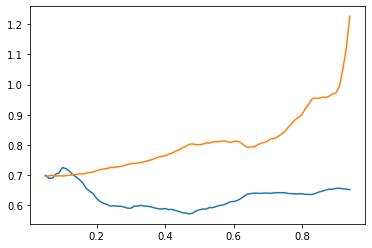

In [8]:
prct = 0.05
mse_res_train = []
mse_res_test = []
xplot = []
while (prct <= 0.95):
	xplot.append(prct)
	x_training = split_training(x, prct)
	x_testing = split_testing(x, prct)
	y_training = split_training(y, prct)
	y_testing = split_testing(y, prct)
	theata, residuals, rank, s = numpy.linalg.lstsq(x_training, y_training)
	mse_res_train.append([mse_calc(x_training, y_training, theata)])
	mse_res_test.append([mse_calc(x_testing, y_testing, theata)])
	prct = prct + 0.01

plt.plot(xplot, mse_res_train)
plt.plot(xplot, mse_res_test)

8.

The prediction accuracy of testing set is 0.5597734475085968, the proportion of positive labels is 0.9122041669476098, and the proportion of positive predictions is 0.9989886049490931

In [9]:
def featurea(datum):
	feat = [1]
	feat.append(datum['star_rating'])
	feat.append(len(datum['review_body']))
	return feat
def featureb(datum):
	feat = []
	if datum['verified_purchase'] == "Y":
		feat.append(1)
	elif datum['verified_purchase'] == "N":
		feat.append(0)
	return feat

In [10]:
x = [featurea(d) for d in dataset]
y = [featureb(d) for d in dataset]
x_training = split_training(x, 0.9)
x_testing = split_testing(x, 0.9)
y_training = split_training(y, 0.9)
y_testing = split_testing(y, 0.9)
theata4, residuals, rank, s = numpy.linalg.lstsq(x_training, y_training)
theata4

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([[ 8.83876144e-01],
       [ 1.72177077e-02],
       [-1.24038722e-04]])

In [11]:
def flat_list(list):
    flat_list = []
    for sublist in list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

from sklearn import linear_model
mod = linear_model.LogisticRegression()
mod.fit(x_training, y_training)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
train_predictions = mod.predict(x_training)
test_predictions = mod.predict(x_testing)
correct_train_predictions =  train_predictions == flat_list(y_training)
correct_test_predictions = test_predictions == flat_list(y_testing)
p_train_accuracy = sum(correct_train_predictions)/ len(correct_train_predictions)
p_test_accuracy = sum(correct_test_predictions)/ len(correct_test_predictions)

In [13]:
p_test_accuracy

0.5597734475085968

In [14]:
positive_lable = ["Y" in d['verified_purchase'] for d in dataset]
positive_lable = sum(positive_lable) * 1.0 / len(positive_lable)
positive_lable

0.9122041669476098

In [15]:
positive_test = test_predictions
positive_test = sum(positive_test) * 1.0 / len(positive_test)
positive_test

0.9989886049490931

9.

I would take the 'helpful_votes' and 'total_votes' feature into account. 

p(review is verified) ~= sigma(theta0 + theta1 x [star rating] + theta2 x [review length] + theta3 x [helpful votes num]) + theta4 x [total votes]

The training set accuracy is 0.9512058076551367 and the testing set accuracy is 0.5601105791922325.

In [16]:
def featurea(datum):
	feat = [1]
	feat.append(datum['star_rating'])
	feat.append(len(datum['review_body']))
	feat.append(datum['helpful_votes'])
	feat.append(datum['total_votes']) 
	return feat
def featureb(datum):
	feat = []
	if datum['verified_purchase'] == "Y":
		feat.append(1)
	elif datum['verified_purchase'] == "N":
		feat.append(0)
	return feat

x = [featurea(d) for d in dataset]
y = [featureb(d) for d in dataset]
x_training = split_training(x, 0.9)
x_testing = split_testing(x, 0.9)
y_training = split_training(y, 0.9)
y_testing = split_testing(y, 0.9)
theata5, residuals, rank, s = numpy.linalg.lstsq(x_training, y_training)
theata5

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


array([[ 8.86383854e-01],
       [ 1.67151219e-02],
       [-1.23994456e-04],
       [ 4.15450829e-03],
       [-3.78389520e-03]])

In [17]:
from sklearn import linear_model
mod = linear_model.LogisticRegression()
mod.fit(x_training, y_training)

def flat_list(list):
    flat_list = []
    for sublist in list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
train_predictions = mod.predict(x_training)
test_predictions = mod.predict(x_testing)

correct_train_predictions =  train_predictions == flat_list(y_training)
correct_test_predictions = test_predictions == flat_list(y_testing)
p_train_accuracy = sum(correct_train_predictions)/ len(correct_train_predictions)
p_test_accuracy = sum(correct_test_predictions)/ len(correct_test_predictions)


In [19]:
p_train_accuracy

0.9512058076551367

In [20]:
p_test_accuracy

0.5601105791922325